In [2]:
import os
import subprocess
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from Bio import SeqIO
from Bio.PDB.PDBExceptions import PDBConstructionWarning
from tqdm.notebook import tqdm

import _file_paths as fp    

In [25]:
# plantaznik version
chain_dir_path = os.path.join(fp.POSITIONS_ALIGNED_DIR_PATH, 'merged')
file_names = os.listdir(chain_dir_path)
chain_lengths = dict(L=[], H=[])
for file_name in tqdm(file_names, desc='Generating length distribution plots..'):
    with open(os.path.join(chain_dir_path, file_name)) as input_file:
        l, h = input_file.readlines()
        chain_lengths['L'].append(len(l.split()))
        chain_lengths['H'].append(len(h.split()))

Generating length distribution plots..:   0%|          | 0/4228 [00:00<?, ?it/s]

In [14]:
# dataframe version 
fasta_aligned_df = pd.read_csv('../../data/csv/fasta_aligned.csv', index_col=0, dtype=object)
fasta_unaligned_df = pd.read_csv('../../data/csv/fasta_merged.csv', index_col=0)
aligned_lengths = list(fasta_aligned_df.count(axis=1))
unaligned_lengths = list(fasta_unaligned_df.count(axis=1))

<AxesSubplot:ylabel='Count'>

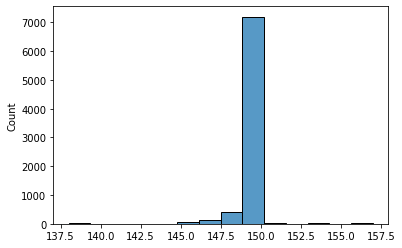

In [15]:
sns.histplot(data=aligned_lengths)

<AxesSubplot:ylabel='Count'>

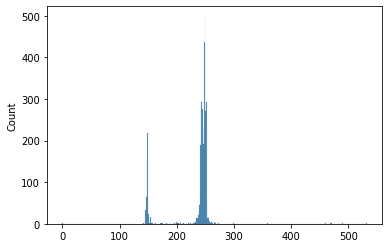

In [27]:
sns.histplot(data=unaligned_lengths)